<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Clase_H_68_Sep_18_RV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Época 1/10, Pérdida: [119.32064385]
Época 2/10, Pérdida: [113.14938489]
Época 3/10, Pérdida: [104.77628396]
Época 4/10, Pérdida: [103.35604943]
Época 5/10, Pérdida: [104.75480258]
Época 6/10, Pérdida: [103.52853007]
Época 7/10, Pérdida: [108.8829842]
Época 8/10, Pérdida: [99.58454978]
Época 9/10, Pérdida: [99.90065328]
Época 10/10, Pérdida: [104.09691525]
Parámetro theta0: [4.32957631]
Parámetro theta1: [3.07804588]


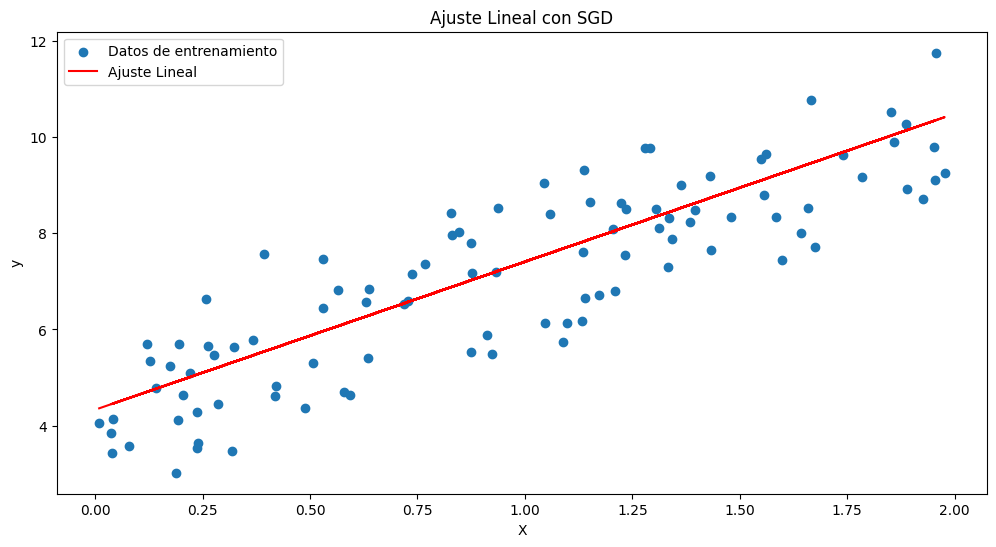

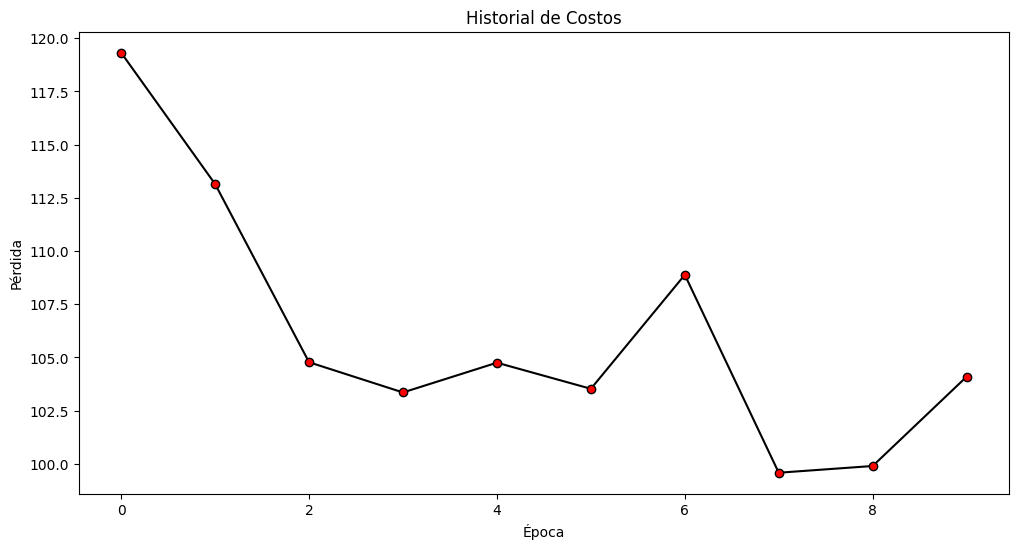

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida (ejemplo: regresión lineal)
def loss_function(y_true, y_pred):
    return (y_true - y_pred)**2

# Gradiente de la función de pérdida con respecto a los parámetros
def gradient(y_true, y_pred, X):
    return -2 * X * (y_true - y_pred)

# Datos de entrenamiento (ejemplo: regresión lineal simple)
# Datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)#Incluye ruido
# Inicialización de parámetros (ejemplo: regresión lineal simple)
theta0 = 0.5
theta1 = 0.5

# Hiperparámetros de SGD
learning_rate = 0.01
epochs = 10

# Listas para almacenar el historial de costos y los parámetros
cost_history = []
theta0_history = []
theta1_history = []

# Algoritmo de SGD
for epoch in range(epochs):
    for i in range(len(X)):
        # Selección aleatoria de un punto de datos
        random_index = np.random.randint(0, len(X))#Valor entre 0 y len(X)
        xi = X[random_index]
        yi = y[random_index]

        # Cálculo de la predicción
        prediction = theta0 + theta1 * xi

        # Cálculo del gradiente
        grad_theta0 = gradient(yi, prediction, 1)
        grad_theta1 = gradient(yi, prediction, xi)

        # Actualización de parámetros
        theta0 -= learning_rate * grad_theta0
        theta1 -= learning_rate * grad_theta1

    # Cálculo de la pérdida total en esta época
    total_loss = 0
    for i in range(len(X)):
        prediction = theta0 + theta1 * X[i]
        total_loss += loss_function(y[i], prediction)

    # Almacenar el historial de costos y parámetros
    cost_history.append(total_loss)
    theta0_history.append(theta0)
    theta1_history.append(theta1)

    # Imprimir la pérdida en cada época
    print(f'Época {epoch+1}/{epochs}, Pérdida: {total_loss}')


# Parámetros finales
print(f'Parámetro theta0: {theta0}')
print(f'Parámetro theta1: {theta1}')

# Gráfico de ajuste lineal
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, theta0 + theta1 * X, color='red', label='Ajuste Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste Lineal con SGD')
plt.show()

# Gráfico del historial de costos
plt.figure(figsize=(12,6))
plt.plot(range(epochs), cost_history,color='black', marker='o', markerfacecolor='red')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Historial de Costos')
plt.show()


Época 1/10, Pérdida: 1.1932064385323073
Época 2/10, Pérdida: 1.1314938489460211
Época 3/10, Pérdida: 1.0477628396384442
Época 4/10, Pérdida: 1.0335604942750691
Época 5/10, Pérdida: 1.0475480258456065
Época 6/10, Pérdida: 1.035285300712662
Época 7/10, Pérdida: 1.0888298420413163
Época 8/10, Pérdida: 0.9958454978499078
Época 9/10, Pérdida: 0.9990065328074037
Época 10/10, Pérdida: 1.04096915247266
Parámetro theta0: 4.329576305574221
Parámetro theta1: 3.0780458813595915


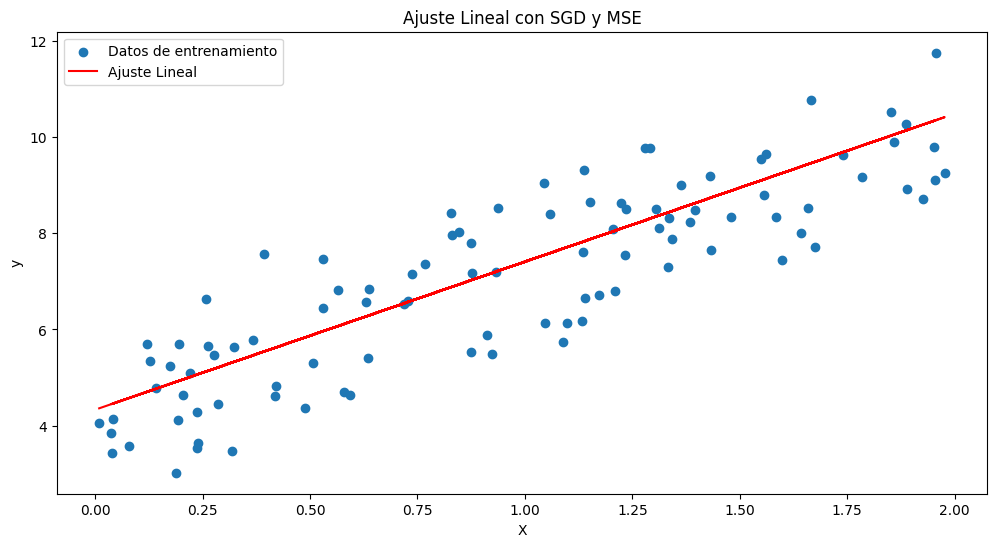

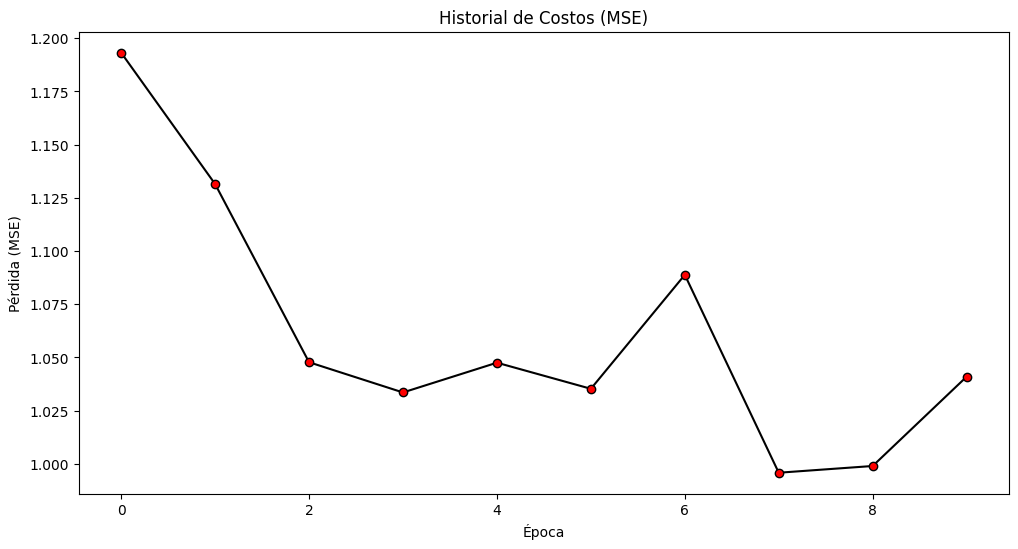

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida (MSE) y gradiente
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_mse(y_true, y_pred, X):
    n = len(X)
    grad_theta0 = (-2 / n) * np.sum(y_true - y_pred)
    grad_theta1 = (-2 / n) * np.sum((y_true - y_pred) * X)
    return grad_theta0, grad_theta1

# Datos de entrenamiento
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Incluye ruido

# Inicialización de parámetros
theta0 = 0.5
theta1 = 0.5

# Hiperparámetros de SGD
learning_rate = 0.01
epochs = 10

# Listas para almacenar el historial de costos y los parámetros
cost_history = []
theta0_history = []
theta1_history = []

# Algoritmo de SGD
for epoch in range(epochs):
    for i in range(len(X)):
        # Selección aleatoria de un punto de datos
        random_index = np.random.randint(0, len(X))
        xi = X[random_index]
        yi = y[random_index]

        # Cálculo de la predicción
        prediction = theta0 + theta1 * xi

        # Cálculo del gradiente utilizando MSE
        grad_theta0, grad_theta1 = gradient_mse(yi, prediction, xi)

        # Actualización de parámetros
        theta0 -= learning_rate * grad_theta0
        theta1 -= learning_rate * grad_theta1

    # Cálculo de la pérdida total en esta época utilizando MSE
    y_pred = theta0 + theta1 * X
    total_loss = mse_loss(y, y_pred)

    # Almacenar el historial de costos y parámetros
    cost_history.append(total_loss)
    theta0_history.append(theta0)
    theta1_history.append(theta1)

    # Imprimir la pérdida en cada época
    print(f'Época {epoch+1}/{epochs}, Pérdida: {total_loss}')

# Parámetros finales
print(f'Parámetro theta0: {theta0}')
print(f'Parámetro theta1: {theta1}')

# Gráfico de ajuste lineal
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, theta0 + theta1 * X, color='red', label='Ajuste Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste Lineal con SGD y MSE')
plt.show()

# Gráfico del historial de costos
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), cost_history, color='black', marker='o', markerfacecolor='red')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Historial de Costos (MSE)')
plt.show()
